In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

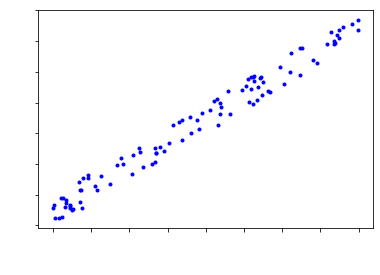

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 20, color = 'w')
plt.xticks(color='w')
plt.ylabel('$y$', fontsize = 20, color = "w", rotation = 0)
plt.yticks(color='w')
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.46096019],
       [3.05468776]])

In [7]:
X_new = np.array([[0], [2]])

In [8]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [9]:
y_pred = X_new_b.dot(theta_best)

In [10]:
y_pred

array([[ 4.46096019],
       [10.5703357 ]])

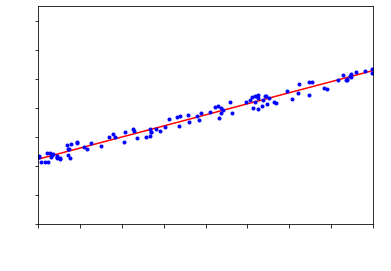

In [11]:
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 20, color = 'w')
plt.xticks(color='w')
plt.ylabel('$y$', fontsize = 20, color = "w", rotation = 0)
plt.yticks(color='w')
plt.axis((0, 2, 0, 15))
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X, y)
l_reg.intercept_, l_reg.coef_

(array([4.46096019]), array([[3.05468776]]))

In [13]:
l_reg.predict(X_new)

array([[ 4.46096019],
       [10.5703357 ]])

In [14]:
eta = .1 #learning rate
n_iterations = 1000
m_ = 100 #n of feature pnts

In [15]:
theta_ = np.random.rand(2, 1)

In [16]:
for iteration in range(n_iterations):
    gradients = (2/m_) * X_b.T.dot(X_b.dot(theta_) - y)
    theta_ = theta_ - eta * gradients

In [17]:
theta_

array([[4.46096019],
       [3.05468776]])

In [18]:
def plot_gd (theta_, eta, epsilon = 0):
    m_ = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 100:
            y_pred_ = X_new_b.dot(theta_)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_pred_, style)
        gradients = (2/m_) * X_b.T.dot(X_b.dot(theta_) - y)
        if(np.linalg.norm(eta * gradients) < epsilon): 
            break
        theta_ = theta_ - eta * gradients
    print("n of iterations to finish " + str(iteration + 1))
    plt.xlabel('$x_1$', fontsize = 10, color = 'w')
    plt.xticks(color = "w")
    plt.yticks(color = 'w')
    plt.title(r'$\eta = {}$'.format(eta), fontsize = 18, color = 'w')

n of iterations to finish 18
n of iterations to finish 7
n of iterations to finish 1000


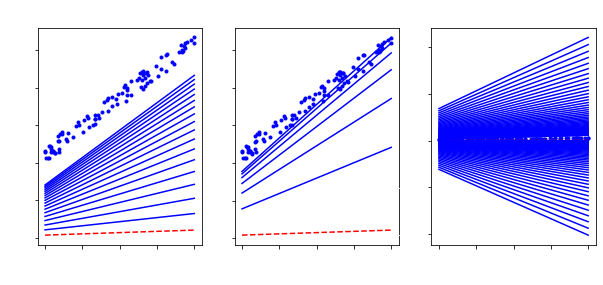

In [19]:
np.random.seed(66)

theta_ = np.random.rand(2, 1)
plt.figure(figsize = (10, 4))
plt.subplot(131);
plot_gd(theta_, eta = .02, epsilon = .1)
plt.ylabel('$y$', rotation = 0, fontsize = 18, color = 'w')

plt.subplot(132);
plot_gd(theta_, eta = .1, epsilon = .1)

plt.subplot(133);
plot_gd(theta_, eta = .5)

plt.show()

In [32]:
m = 100
X_ = 6*np.random.rand(m, 1) - 3
y_ = .5*X_**2 + X_ + 2 + np.random.randn(m, 1)

<IPython.core.display.Javascript object>


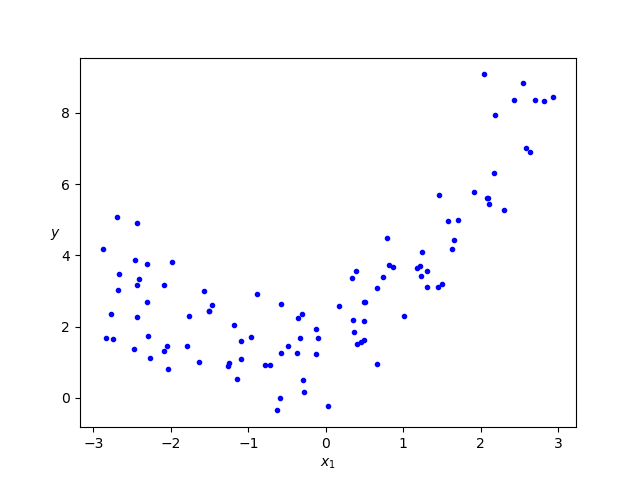

In [33]:
%matplotlib notebook
plt.plot(X_, y_, 'b.')
plt.xlabel(r'$x_1$', fontsize = 10)
plt.ylabel(r'$y$', fontsize = 10, rotation = 0)
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X_)

In [35]:
X_[1]

array([-2.68321594])

In [36]:
X_poly[1]

array([-2.68321594,  7.19964778])

In [37]:
l_reg_poly = l_reg.fit(X_poly, y_)
l_reg_poly

LinearRegression()

In [38]:
l_reg_poly.intercept_, l_reg_poly.coef_

(array([1.77187562]), array([[0.9186108 , 0.53938227]]))

<IPython.core.display.Javascript object>


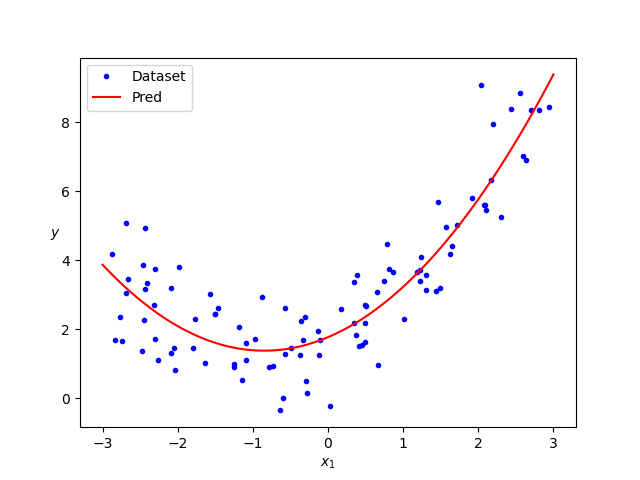

In [39]:
%matplotlib notebook
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = l_reg_poly.predict(X_new_poly)
plt.plot(X_, y_, 'b.', label = 'Dataset')
plt.plot(X_new, y_new, 'r-', label = 'Pred')
plt.xlabel(r'$x_1$', fontsize = 10)
plt.ylabel(r'$y$', fontsize = 10, rotation = 0)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


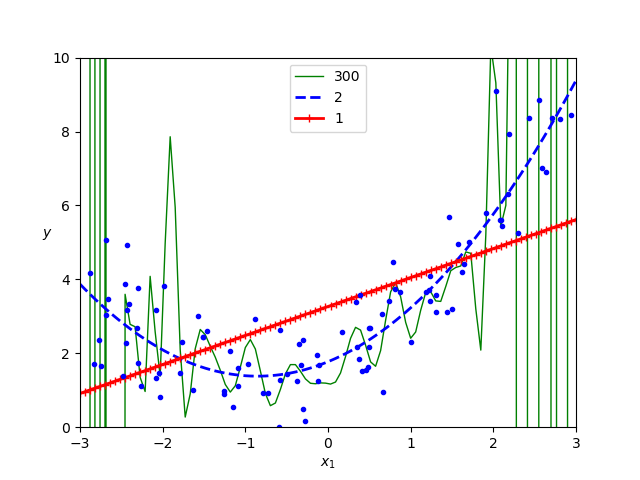

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib notebook
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ('r-+', 2, 1)):
    polybig = PolynomialFeatures(degree = degree, include_bias = False)
    scaler = StandardScaler()
    poly_reg = Pipeline([
        ('poly', polybig),
        ('scaler', scaler),
        ('l_reg', l_reg),
    ])
    
    poly_reg.fit(X_, y_)
    y_newbig = poly_reg.predict(X_new)
    plt.plot(X_new, y_newbig, style, label = str(degree), linewidth = width)

plt.plot(X_, y_, 'b.', linewidth = 4)
plt.legend()
plt.xlabel('$x_1$', fontsize = 10)
plt.ylabel('$y$', fontsize = 10, rotation = 0)
plt.axis((-3, 3, 0, 10))
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X_, y_):
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size = .2)
    train_err, val_err = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_err.append(mean_squared_error(y_train[:m], y_train_pred))
        val_err.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_err), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_err), 'b--', linewidth = 2, label = 'val')
    plt.legend()
    plt.xlabel('train', fontsize = 15)
    plt.ylabel('RMSE', fontsize = 15)

<IPython.core.display.Javascript object>


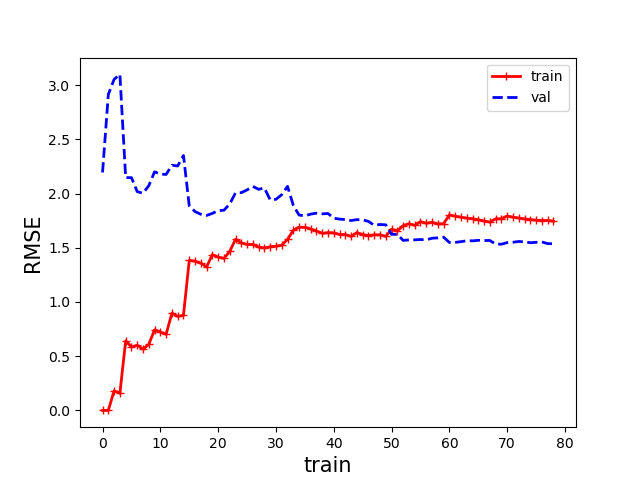

In [42]:
plot_learning_curves(l_reg, X_, y_)

<IPython.core.display.Javascript object>


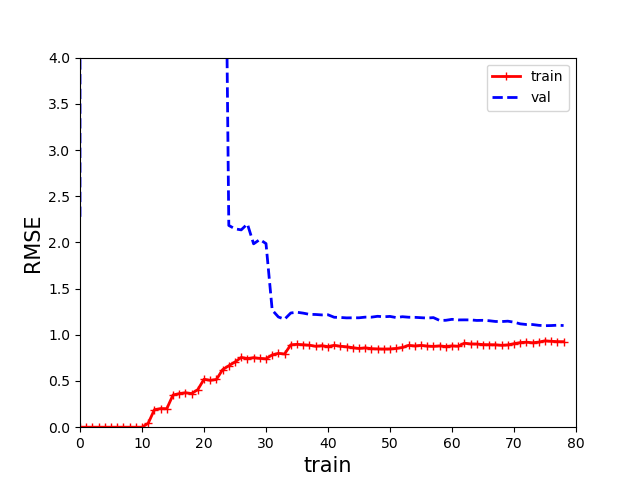

In [43]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree = 10, include_bias = False)),
    ('l_reg', LinearRegression())
])

plot_learning_curves(poly_reg, X_, y_)
plt.axis([0, 80, 0, 4])
plt.show()